# <span style="color:#F72585"><center>LLE: Embedding Localmente Lineal</center></span>



<figure>
<center>
<img src="../Imagenes/lle.jpg" width="420" height="400" align="center" /> 
</center>   
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:GlobePuzzle.jpg#/media/File:GlobePuzzle.jpg">Nathan Livings</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a> , via Wikimedia Commons


## <span style="color:#4361EE">Referencias</span>

1. Lawrence k. Saul, SamT. Roweis, *An Introduction to Locally Linear Embedding*, unpublished draft. https://pdfs.semanticscholar.org/6caa/85183b231c2dc86eb65faa53a7e747c9fd16.pdf  
2. John A. Lee and Michel Verleysen. *Nonlinear dimensionality reduction*. Springer, first edition, 2007.
3. Christopher J. C. Burges, *Dimension Reduction: A Guided Tour*, Foundations and Trends in Machine Learning, Vol. 2, No. 4 (2009) 275–365.
4. S. Marsland, “Machine Learning: An Algorithmic Perspective”, Chapter 10, 2009. http://seat.massey.ac.nz/personal/s.r.marsland/Code/10/lle.py
5. Mihir, [Locally Linear Embedding (LLE) | Data Mining and Machine Learning](https://medium.com/analytics-vidhya/locally-linear-embedding-lle-data-mining-b956616d24e9)
6. Saul Dobilas, [LLE: Locally Linear Embedding — A Nifty Way to Reduce Dimensionality in Python](https://towardsdatascience.com/lle-locally-linear-embedding-a-nifty-way-to-reduce-dimensionality-in-python-ab5c38336107)
7. Yugesh Verma, [A Guide to Locally Linear Embedding for Dimensionality Reduction](https://analyticsindiamag.com/a-guide-to-locally-linear-embedding-for-dimensionality-reduction/)

## <span style="color:#4361EE">Introducción</span>

Aquí se describe la incrustación lineal local (LLE), un algoritmo de aprendizaje no supervisado que calcula incrustaciones de datos de alta dimensión que conservan la vecindad de baja dimensión. LLE intenta descubrir la estructura no lineal en datos de alta dimensión explotando las simetrías locales de las reconstrucciones lineales.

LLE mapea sus entradas en un solo sistema de coordenadas global de menor dimensionalidad, y sus optimizaciones, aunque son capaces de generar incrustaciones altamente no lineales, no involucran mínimos locales.


Probaremos estos algoritmos en un conjunto de datos no lineales "swiss roll" generados por sklearn.

## <span style="color:#4361EE">Algoritmo</span>

El algoritmo LLE, se basa en intuiciones geométricas simples. Suponga que los datos consisten en $N$ vectores de valor real $x_i$, cada uno de dimensionalidad $D$, muestreados de alguna variedad subyacente suave.

Siempre que haya suficientes datos (como que la variedad esté bien muestreada), esperamos que cada punto de datos y sus vecinos se encuentren en o cerca de un parche localmente lineal de la variedad.

Podemos caracterizar la geometría local de estos parches mediante coeficientes lineales que reconstruyen cada punto de datos a partir de sus vecinos. En la formulación más simple de LLE, uno identifica $K$ vecinos más cercanos por punto de datos, medido por la distancia euclidiana. (Alternativamente, uno puede identificar vecinos eligiendo todos los puntos dentro de una bola de radio fijo, o usando reglas más sofisticadas basadas en métricas locales).

Luego, los errores de reconstrucción se miden mediante la función de costo:

$$
\mathcal{E}(W) = \sum_{i=1}^{N}\left[x_i-\sum_j w_{ij} x_j \right]^2
$$

que suma las distancias al cuadrado entre todos los puntos de datos y sus reconstrucciones. Los pesos $w_{ij}$ resumen la contribución del $j$-ésimo punto de datos a la $i$-ésima reconstrucción. Para calcular los pesos $w_{ij}$, minimizamos la función de costo sujeta a dos restricciones: primero, que cada punto de datos $x_i$ se reconstruya solo a partir de sus vecinos, haciendo cumplir $w_{ij}=0$ si $x_j$ no pertenece a este conjunto; segundo, que las filas de la matriz de peso suman uno: $\sum_j w_{ij}=1$.

Los pesos óptimos $w_{ij}$ sujetos a estas restricciones se encuentran resolviendo un problema de mínimos cuadrados, como se explica en la referencia 1.

## <span style="color:#4361EE">Discusión</span>

Los pesos restringidos que minimizan estos errores de reconstrucción obedecen a una simetría importante: para cualquier punto de datos en particular, son invariantes a las rotaciones, cambios de escala y traslaciones de ese punto de datos y sus vecinos. La invariancia a las rotaciones y cambios de escala se deriva inmediatamente de la función de costo; la invariancia a las traslaciones se impone mediante la restricción de suma a uno en las filas de la matriz de peso.

Una consecuencia de esta simetría es que los pesos de reconstrucción caracterizan las propiedades geométricas intrínsecas de cada vecindario, a diferencia de las propiedades que dependen de un marco de referencia particular.

## <span style="color:#4361EE">Intuición</span>

De manera informal, imagine tomar un par de tijeras, cortar parches localmente lineales de la variedad subyacente y colocarlos en el espacio de incrustación de baja dimensión.

Suponga además que esta operación se realiza de forma que conserva los ángulos formados por cada punto de datos con sus vecinos más cercanos.

En este caso, el trasplante de cada parche no implica más que una traslación, rotación y reescalado de sus datos, exactamente las operaciones a las que los pesos son invariantes. Por lo tanto, cuando el parche llega a su destino de baja dimensión, esperamos que los mismos pesos reconstruyan cada punto de datos a partir de sus vecinos.

## <span style="color:#4361EE">Embedding</span>

LLE construye un mapeo que preserva la vecindad basado en la idea anterior. En el paso final del algoritmo, cada observación de alta dimensión $x_i$ se asigna a un vector de baja dimensión $y_i$ que representa las coordenadas internas globales en la variedad. Esto se hace eligiendo $d$-coordenadas dimensionales $y_i$ para minimizar la función de costo incrustado:

$$
\mathcal{\phi}(W) = \sum_{i=1}^{N}\left[y_i-\sum_j w_{ij}y_j \right]^2
$$

Esta función de costo, como la anterior, se basa en errores de construcción lineales locales, pero aquí arreglamos los pesos $w_{ij}$, mientras optimizamos las coordenadas $y_{ij}$. El costo del embedding $\mathcal{\phi}(W)$ define una forma cuadrática en los vectores $y_i$. Sujeto a restricciones que hacen que el problema esté bien planteado, se puede minimizar resolviendo un problema de vectores propios dispersos $N \times N$, cuyos vectores propios inferiores $d$ distintos de cero proporcionan un conjunto ordenado de coordenadas ortogonales centradas en el origen. Los detalles de este problema de vector propio se discuten en la referencia 1.

<h3>Swiss Roll data set</h3>

Una ilustración de la reducción de Swiss Roll con incrustación localmente lineal



## <span style="color:#4361EE">Generación de Datos</span>

In [2]:
import matplotlib.pyplot as plt

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D

from matplotlib.ticker import NullFormatter
from sklearn.manifold import locally_linear_embedding
from sklearn import datasets

n_points = 1500
# Swiss roll dataset
X, color = datasets.make_swiss_roll(n_samples=1500)


Visualización de los datos

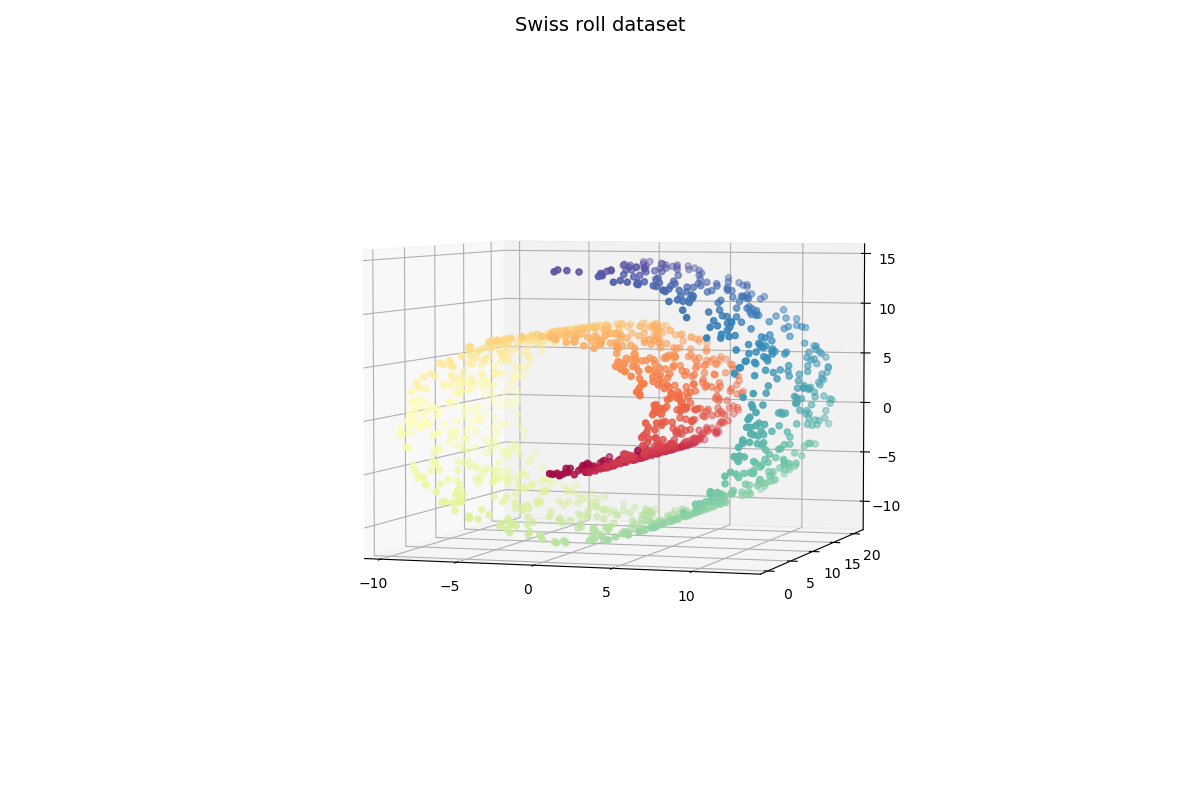

In [4]:
%matplotlib widget
#fig, ax = plt.subplots(1,1,figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
plt.suptitle("Swiss roll dataset", fontsize=14)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)


In [5]:
print(X)

[[-9.34784732 16.74547876 -2.56020059]
 [ 0.18920535 17.55400764 -4.74844564]
 [ 3.53933537  4.10619761 -4.10930975]
 ...
 [ 1.8066479   5.20140117  7.39699802]
 [11.2579359   9.52728306  6.70538054]
 [-8.83961106 19.77502372  2.40010649]]


Ahora apliquemos PCA a los datos generados:

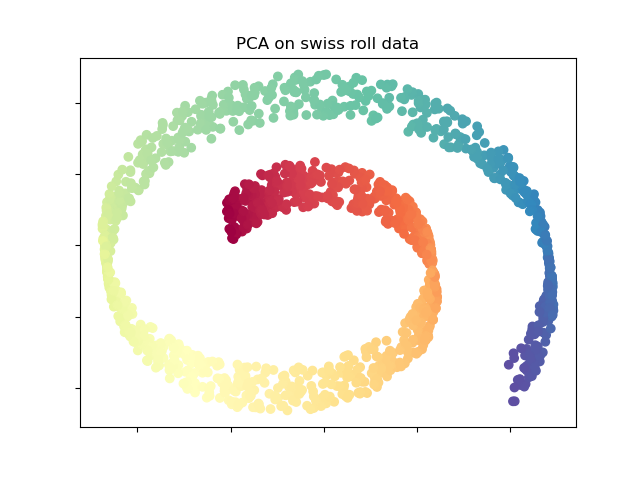

In [6]:
n_components = 2
from sklearn.decomposition import PCA
Y = PCA(n_components).fit_transform(X)
#ax = fig.add_subplot(111)
fig, ax = plt.subplots(1,1)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("PCA on swiss roll data")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

Veamos ahora el resultado de usar el algortimo LLE:

In [17]:
n_components = 2
n_neighbors = 20

print("Computing LLE embedding")
Y, err = locally_linear_embedding(X, n_neighbors=n_neighbors, n_components=n_components)
print("Done. Reconstruction error: %g" % err)


Computing LLE embedding
Done. Reconstruction error: 2.36446e-07


Ahora veamos el plot del Embedding

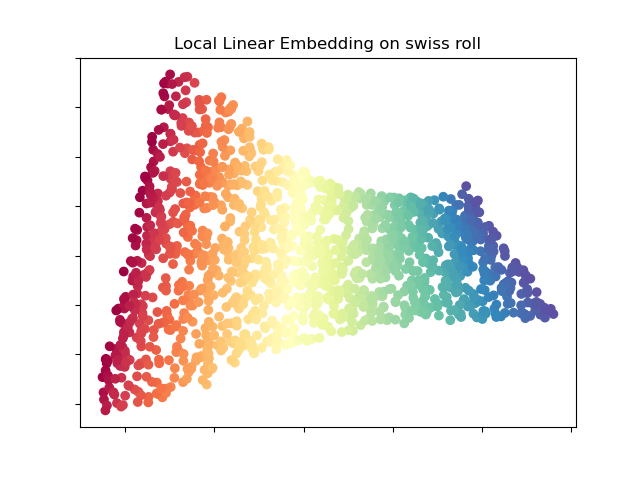

In [18]:
fig, ax = plt.subplots(1,1)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Local Linear Embedding on swiss roll")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

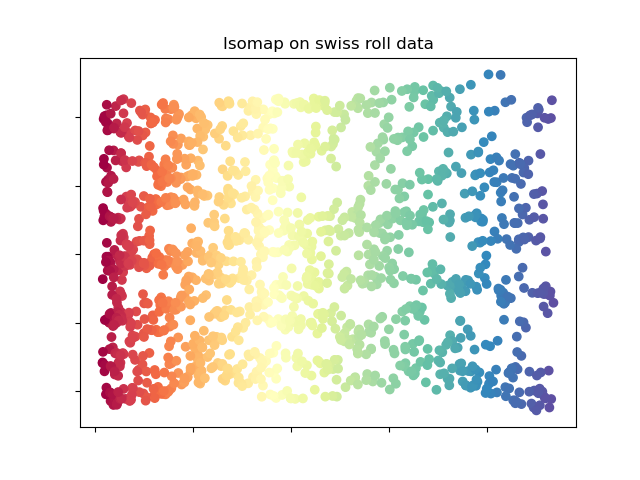

In [20]:
from sklearn.manifold import Isomap

n_components = 2
n_neighbors = 10

Y = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)
fig, ax = plt.subplots(1,1)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap on swiss roll data")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

## <span style="color:#4361EE">Diferencias entre Isomap y LLE</span>

Los dos algoritmos son similares en la forma en que abordan la reducción de la dimensionalidad, pero tienen sus diferencias.

Similar a LLE, Isomap también usa KNN para encontrar los vecinos más cercanos en el primer paso. Sin embargo, el segundo paso construye gráficos de vecindad en lugar de describir cada punto como una combinación lineal de sus vecinos. Luego usa estos gráficos para calcular el camino más corto entre cada par de puntos.

Finalmente, Isomap usa esas distancias por pares entre todos los puntos para construir una incrustación de menor dimensión.

## <span style="color:#4361EE">¿Debo elegir LLE sobre Isomap?</span>

En general, LLE es un algoritmo más eficiente ya que elimina la necesidad de estimar distancias por pares entre puntos de datos muy separados. Además, asume que la variedad es lineal cuando se ve localmente. Así recupera la estructura no lineal de los ajustes localmente lineales.

Sin embargo, debido a que LLE se enfoca en preservar solo las estructuras locales, puede introducir algunas distorsiones inesperadas a escala global.

### <span style="color:red">**Tarea**</span>

Busque en la literatura sobre MLLE (Modified Linearly Local Embedding), Hessian LLE e impleméntelas sobre MNIST (784 dimensiones) y MNIST Fashion.

¿Qué diferencias nota respecto a Isomap y LLE?